In [1]:
%pylab inline
rcParams["figure.figsize"] = (16,5)

import sys
sys.path.insert(0, "..")

Populating the interactive namespace from numpy and matplotlib


In [6]:
import torch

from scipy.io import wavfile
import pysptk
from pysptk.synthesis import Synthesizer, MLSADF
import pyworld
from os.path import join, basename

from nnmnkwii import preprocessing as P
from nnmnkwii.paramgen import unit_variance_mlpg_matrix

import gantts
from hparams import vc as hp

import librosa
import librosa.display
import IPython
from IPython.display import Audio

ModuleNotFoundError: ignored

In [3]:
!pip3 install pysptk

     |████████████████████████████████| 419 kB 5.1 MB/s 
  Created wheel for pysptk: filename=pysptk-0.1.18-cp37-cp37m-linux_x86_64.whl size=951877 sha256=ed5b23c9de9d1bfd488505578ac0288928ce735aa9571de4da563133f96d133a
  Stored in directory: /root/.cache/pip/wheels/44/95/38/580fe995213257289c69bf74f4d122e39cd134c731fe17a5a6
Successfully built pysptk


In [5]:
!pip3 install pyworld

     |████████████████████████████████| 212 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyworld: filename=pyworld-0.3.0-cp37-cp37m-linux_x86_64.whl size=609940 sha256=9e6533fd28b347a493bb058f9c9f31d61764941dad9e29cfc4becea63423e3ed
  Stored in directory: /root/.cache/pip/wheels/e7/7c/11/c775fffa0e1e7b05a6604b4323408a77f80fb4ab304d96b5c6
Successfully built pyworld


In [20]:
name = "1.wav"

clb_wav_dir = "/content/Audio_data/A/"
slt_wav_dir = "/content/Audio_data/B/"
src_path = join(clb_wav_dir, name)
tgt_path = join(slt_wav_dir, name)

In [21]:
name = "1.wav"

src_path = join(clb_wav_dir, name)
tgt_path = join(slt_wav_dir, name)

In [25]:
import librosa
import librosa.display
import IPython
from IPython.display import Audio
def compute_static_features(path):
    fs, x = wavfile.read(path)
    x = x.astype(np.float64)
    f0, timeaxis = pyworld.dio(x, fs, frame_period=5.0)
    f0 = pyworld.stonemask(x, f0, timeaxis, fs)
    spectrogram = pyworld.cheaptrick(x, f0, timeaxis, fs)
    aperiodicity = pyworld.d4c(x, f0, timeaxis, fs)
    alpha = pysptk.util.mcepalpha(fs)
    mc = pysptk.sp2mc(spectrogram, order=24, alpha=alpha)
    c0, mc = mc[:, 0], mc[:, 1:]
    return mc
    
def vis_gv(src_path, tgt_path):    
    tgt_mgc = compute_static_features(tgt_path)
    tgt_mgc1 = compute_static_features(src_path)
    #waveform_in2out, _, mgc_in2out = test_vc_from_path(
        #model_in2out, src_path, data_mean, data_std, diffvc=True)
    #waveform_gan, _, mgc_gan = test_vc_from_path(
        #model_gan, src_path, data_mean, data_std, diffvc=True)
    
    figure(figsize=(16,6))
    plot(np.var(tgt_mgc, axis=0), "--", linewidth=2, label="Target: global variances")
    plot(np.var(tgt_mgc1, axis=0), linewidth=2, label="source: global variances")
    #plot(np.var(mgc_in2out, axis=0), linewidth=2, label="In2Out: global variances")
    #plot(np.var(mgc_gan, axis=0), linewidth=2, label="GAN: global variances")
    legend(prop={"size": 18})
    yscale("log")
    xlim(0,24)
    ylabel("GV", fontsize=16)
    xlabel("index of Mel-cepstral coefficient", fontsize=16)
        
    fs, src_waveform = wavfile.read(src_path)
    fs, tgt_waveform = wavfile.read(tgt_path)
    
    for x, name in [(src_waveform, "Source waveform"),
                   (tgt_waveform, "Target waveform")]:
                   #(waveform_in2out, "In2Out"),
                   #(waveform_gan, "GAN")]:
        print(name)
        IPython.display.display(Audio(x, rate=fs))

Source waveform


Target waveform


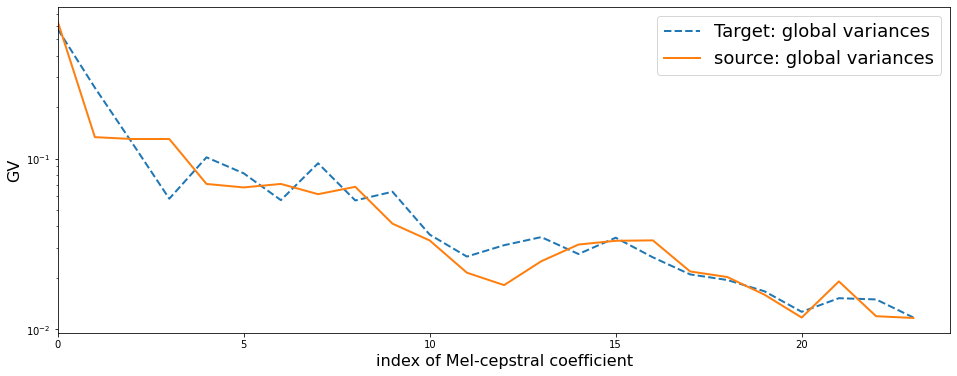

In [26]:
vis_gv(src_path, tgt_path)